<a href="https://colab.research.google.com/github/Varun221/Real_time_emotion_detection/blob/master/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the libraries
# %tensorflow_version 2.x
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# mapping emotion to index
emotions  = ['angry', 'happy', 'neutral', 'sad', 'surprise']

emotion_to_index = {k:i for i,k in enumerate(emotions)}
index_to_emotion = {i:k for k,i in emotion_to_index.items()}

In [3]:
# Lets load up the files
X_train = np.load('../../Data/X_train.npy')
X_test = np.load('../../Data/X_test.npy')
Y_train = np.load('../../Data/Y_train.npy')
Y_test = np.load('../../Data/Y_test.npy')
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((24176, 48, 48, 3), (24176, 1), (6043, 48, 48, 3), (6043, 1))

In [1]:
# visualizing the files based on index
index = 0
img = X_train[index,:,:,:]
print(f"This is {index_to_emotion[Y_train[index, 0]]}")
img = img.astype(np.uint8)
plt.imshow(img, cmap='Greys')
plt.show()

NameError: name 'X_train' is not defined

In [5]:
np.unique(Y_train, return_counts=True)[1]

array([3995, 7215, 4965, 4830, 3171], dtype=int64)

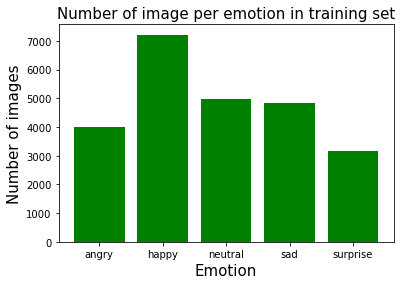

In [6]:
# number of images pertaining to each class
arr = np.unique(Y_train, return_counts=True)[1]
    

arr2 = np.reshape(arr, (-1))

plt.bar(range(len(emotions)), arr2, color='green')
plt.xlabel("Emotion", fontsize = 15)
plt.ylabel("Number of images", fontsize = 15)
plt.title("Number of image per emotion in training set", fontsize=15)
 
plt.xticks(range(len(emotions)), emotions)
 
plt.show()

In [7]:
# preproceesing the images
# scaling the X arrays
# one hot encoding the Y arrays
X_train_proc = X_train/255.
X_test_proc = X_test/255.
Y_train_proc = np.squeeze(np.array(tf.one_hot(Y_train,len(emotions), axis=1)))
Y_test_proc = np.squeeze(np.array(tf.one_hot(Y_test,len(emotions), axis=1)))
Y_train_proc.shape, Y_test_proc.shape

((24176, 5), (6043, 5))

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, BatchNormalization, Dropout, MaxPooling2D, Input

In [9]:
model = Sequential(name='DCNN')

model.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        input_shape=(48, 48, 3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_1'
    )
)
model.add(BatchNormalization(name='batchnorm_1'))
model.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_2'
    )
)
model.add(BatchNormalization(name='batchnorm_2'))

model.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
model.add(Dropout(0.4, name='dropout_1'))

model.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_3'
    )
)
model.add(BatchNormalization(name='batchnorm_3'))
model.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_4'
    )
)
model.add(BatchNormalization(name='batchnorm_4'))

model.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
model.add(Dropout(0.4, name='dropout_2'))

model.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_5'
    )
)
model.add(BatchNormalization(name='batchnorm_5'))
model.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_6'
    )
)
model.add(BatchNormalization(name='batchnorm_6'))

model.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
model.add(Dropout(0.5, name='dropout_3'))

model.add(Flatten(name='flatten'))
    
model.add(
    Dense(
        128,
        activation='elu',
        kernel_initializer='he_normal',
        name='dense_1'
    )
)
model.add(BatchNormalization(name='batchnorm_7'))

model.add(Dropout(0.3, name='dropout_4'))

model.add(
    Dense(
        len(emotions),
        activation='softmax',
        name='out_layer'
    )
)

In [10]:
# input = Input(shape=(48,48,3))
# x = Conv2D(16, (5,5), activation='relu')(input)
# x = BatchNormalization()(x)
# x = MaxPooling2D((3,3), strides=2)(x)
# x = Dropout(0.25)(x)
# x = Conv2D(32, (5,5), activation='relu')(x)
# x = MaxPooling2D((3,3), strides=2)(x)
# x = Dropout(0.2)(x)
# x = Conv2D(64, (4,4), activation='relu')(x)
# x = Flatten()(x)
# x = Dense(40, activation='relu')(x)
# output = Dense(7, activation='softmax')(x)
# model = Model(inputs=input, outputs=output)

In [11]:
model.summary()

Model: "DCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        4864      
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batchnorm_2 (BatchNormalizat (None, 48, 48, 64)        256       
_________________________________________________________________
maxpool2d_1 (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856  

In [12]:
# compiling the model with adam optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

opt = Adam(lr=0.001)
 
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])


early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(X_train_proc)

In [14]:
# def calc_weights(samples_per_class, beta=0.9999):
#     effective_num = 1.0 - beta**samples_per_class
#     weights = (1.0 - beta) / effective_num
#     weights = weights / np.sum(weights)
#     return weights.tolist()

# class_wts = calc_weights(np.unique(Y_train, return_counts=True)[1])
# class_wts

[0.2195831344031455,
 0.14070468649716963,
 0.18479629582856502,
 0.18878700843017598,
 0.2661288748409439]

In [15]:
history = model.fit_generator(
    train_datagen.flow(X_train_proc, Y_train_proc, batch_size=32),
    validation_data=(X_test_proc, Y_test_proc),
    steps_per_epoch=len(X_train_proc) / 32,
    epochs=20,
    callbacks=callbacks,
    # class_weight=class_wts
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 755.5 steps, validate on 6043 samples
Epoch 1/20
756/755 [==============================] - 39s 52ms/step - loss: 1.6759 - accuracy: 0.3017 - val_loss: 1.3719 - val_accuracy: 0.4301
Epoch 2/20
756/755 [==============================] - 26s 34ms/step - loss: 1.4108 - accuracy: 0.4055 - val_loss: 1.6588 - val_accuracy: 0.3568
Epoch 3/20
756/755 [==============================] - 26s 35ms/step - loss: 1.2154 - accuracy: 0.5009 - val_loss: 1.0295 - val_accuracy: 0.5919
Epoch 4/20
756/755 [==============================] - 26s 35ms/step - loss: 1.1090 - accuracy: 0.5531 - val_loss: 1.0701 - val_accuracy: 0.5689
Epoch 5/20
756/755 [==============================] - 26s 35ms/step - loss: 1.0347 - accuracy: 0.5880 - val_loss: 0.9459 - val_accuracy: 0.6302
Epoch 6/20
756/755 [==============================] - 26s 35ms/step - loss: 0.9917 - accuracy: 0.6090 - val_loss: 0.8718 - val_accu

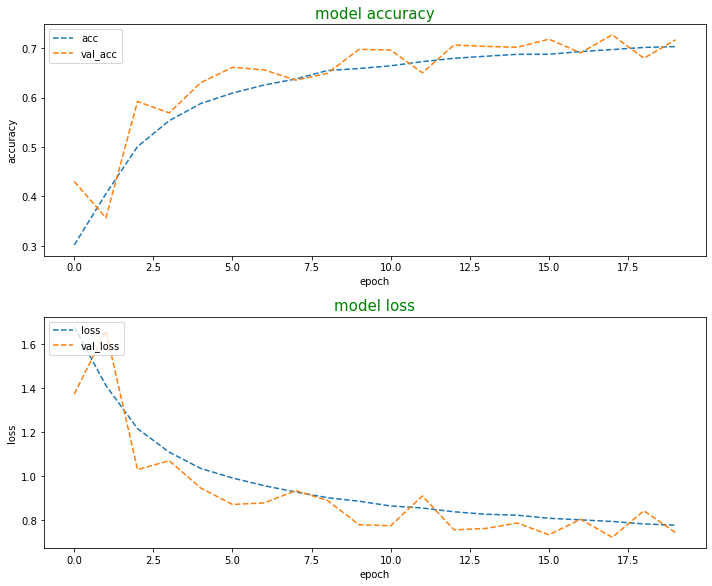

In [16]:
# PLOTTING TRAINING RESULTS
# plotting accuracy, loss, recall, precision and f1 score of training and validation sets
 

 
plt.figure(figsize=(10,20))
 
plt.subplot(511)
plt.plot(history.history['accuracy'], '--', label='acc')
plt.plot(history.history['val_accuracy'], '--',label='val_acc')
plt.title('model accuracy',fontsize=15, color='green')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='upper left')
#axes=plt.gca()
#axes.set_ylim([0.965, 1])
plt.tight_layout(h_pad=3.0)
 
 
plt.subplot(512)
plt.plot(history.history['loss'], '--', label='loss')
plt.plot(history.history['val_loss'], '--',label='val_loss')
plt.title('model loss',fontsize=15, color='green')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
#axes=plt.gca()
 
# plt.subplot(513)
# plt.plot(history.history[prec], '--', label='precision')
# plt.plot(history.history[valprec], '--',label='val_precision')
# plt.title('model precision',fontsize=15, color='green')
# plt.ylabel('precision')
# plt.xlabel('epoch')
# plt.legend(loc='upper left')
# #axes=plt.gca()
 
# plt.subplot(514)
# plt.plot(history.history[rec], '--', label='recall')
# plt.plot(history.history[valrec], '--',label='val_recall')
# plt.title('model recall',fontsize=15, color='green')
# plt.ylabel('recall')
# plt.xlabel('epoch')
# plt.legend(loc='upper left')
# #axes=plt.gca()
 
# precision = history.history[prec]
# recall = history.history[rec]
# precval = history.history[valprec]
# recval = history.history[valrec]
# f1 = [(2*a*b)/(a+b) for a,b in zip(precision, recall)]
# f1_val = [(2*a*b)/(a+b+1e-7) for a,b in zip(precval, recval)]
 
# plt.subplot(515)
# plt.plot(f1, '--', label='f1_score')
# plt.plot(f1_val, '--',label='f1_score_val')
# plt.title('model f1 score',fontsize=15,color='green')
# plt.ylabel('f1 score')
# plt.xlabel('epoch')
# plt.legend(loc='upper left')
# #axes=plt.gca()
 
plt.show()

In [22]:
# classification reports and confusion matrix
from sklearn.metrics import classification_report
print('\nClassification Report\n')
preds = model.predict(X_test_proc)
y_pred = np.argmax(preds, axis=1)
print(classification_report(Y_test, y_pred, target_names=emotions))
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)


Classification Report

              precision    recall  f1-score   support

       angry       0.64      0.61      0.63       958
       happy       0.90      0.82      0.86      1774
     neutral       0.63      0.64      0.63      1233
         sad       0.58      0.65      0.61      1247
    surprise       0.81      0.83      0.82       831

    accuracy                           0.72      6043
   macro avg       0.71      0.71      0.71      6043
weighted avg       0.72      0.72      0.72      6043

Confusion Matrix

[[ 588   27  130  173   40]
 [  62 1461   96   92   63]
 [  69   66  783  287   28]
 [ 149   37  217  808   36]
 [  47   30   22   41  691]]


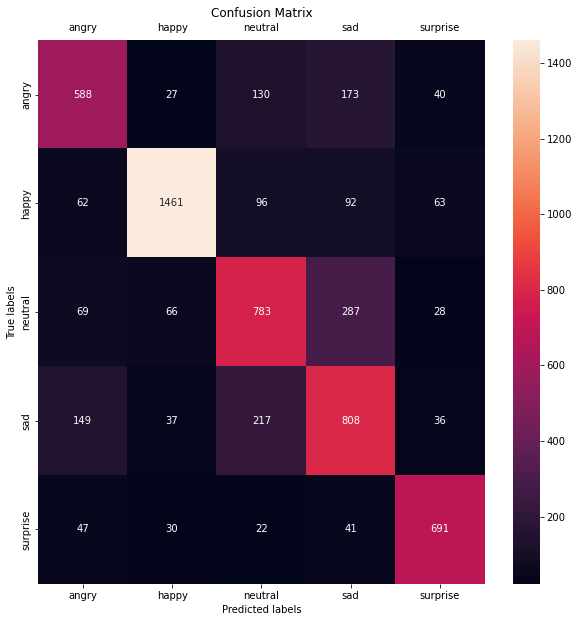

In [18]:
# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt     
 
plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.xaxis.set_tick_params(labeltop='on')
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


ax.xaxis.set_ticklabels(emotions); 
 
ax.yaxis.set_ticklabels(emotions);

In [27]:
# saving the model
model.save('./models/my_model.h5')

In [20]:
import joblib
joblib.dump(index_to_emotion, "models/id_to_emotion.pkl")

['models/id_to_emotion.pkl']